# Landscape Image Classification 
- Lucky Abolorunke

### The images where collected by Intel for image process
the images consist of six classes, images for:
- mountains
- streets
- glacier
- buildings
- sea
- forest

#### Goal of this project
Correctly classify an image within the 6 class without a label

#### Mountains
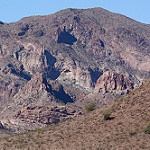

#### Streets
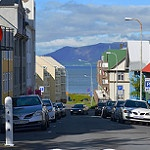

#### Glacier
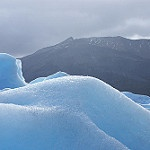

#### Buildings
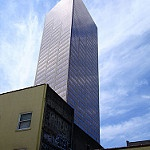

#### sea
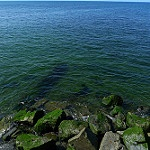


#### Forest

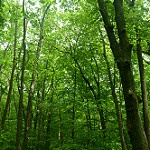

### Importance of Image classification

Image Classification has been an import part of Machine Learning in recent times; mainly, because the world is experience a fast increase in automation and robotics, such as driveless cars, drones, and space rovers.

#### Perseverance Rover
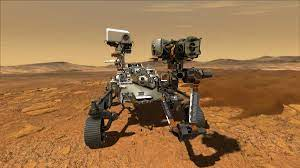


The image above shows the recent rover sent to mars; inorder for this rover to move around they need eyes (camera) and a brain to process the information the camera feeds them. Image process is part of the brain of the rover; the computer can process an image through classification to determine if it rock or ice.


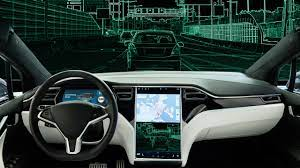
Also, same idea is applied in Telsa driveless cars. They use cameras and the images produce by the cameras are processed through machine learning.



Source of data:
- Intel, Known for developing the microprocessors found in most of the world's personal computers


Intel created natural scene classification challenge on kaggle (https://www.kaggle.com/datasets/puneet6060/intel-image-classification) 

In [4]:
import keras
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
# from keras.optimizers import adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [5]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

In [6]:
labels = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
labels_index = {label:i for i, label in enumerate(labels)}
labels_index

{'mountain': 0,
 'street': 1,
 'glacier': 2,
 'buildings': 3,
 'sea': 4,
 'forest': 5}

In [7]:
def get_data(diretory, size):    
       
    images = []
    labels = []
    # Iterate through each folder corresponding to a category
    for folder in os.listdir(diretory):
        label = labels_index[folder]

        # Iterate through each image in our folder
        for file in tqdm(os.listdir(os.path.join(diretory, folder))):

            # Get the path name of the image
            img_path = os.path.join(os.path.join(diretory, folder), file)

            # make each image 150x150 and also make sure the images are RGB
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#             image = cv2.resize(image, (150,150)) 
            image = cv2.resize(image, size)

    
            images.append(image)
            labels.append(label)

    images = np.array(images, dtype = 'float32')
    labels = np.array(labels, dtype = 'int32')   



    return (images, labels)



In [8]:
print("loading train set...\n")

(train_images, train_labels) = get_data(r"seg_train\seg_train", (150,150))

print("loading test set...\n")

(test_images, test_labels) = get_data(r"seg_test\seg_test", (150,150))

  1%|▌                                                                              | 16/2191 [00:00<00:15, 139.76it/s]

loading train set...



  2%|█▋                                                                                | 9/437 [00:00<00:04, 85.74it/s]

loading test set...



100%|███████████████████████████████████████████████████████████████████████████████| 501/501 [00:03<00:00, 143.78it/s]


### Shuffle images
Shuffle and batch the images to rearrange them, the images are stack on each other, the first 2000+ images are buildings, the next 2000+ are forest and so on, so need to shuffle them.

Shuffling is important because validation data can be any random image, so to avoid overfitting of the training set we need to shuffle

In [ ]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)
test_images, test_labels = shuffle(test_images, test_labels, random_state=25)

In [ ]:
pd.DataFrame({'train': np.unique(train_labels, return_counts=True)[1]},index=labels).plot.bar()

pd.DataFrame({'test': np.unique(test_labels, return_counts=True)[1]},index=labels).plot.bar(color='c')

plt.show()


### Scale the image data

In [9]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

#### Peek at the images

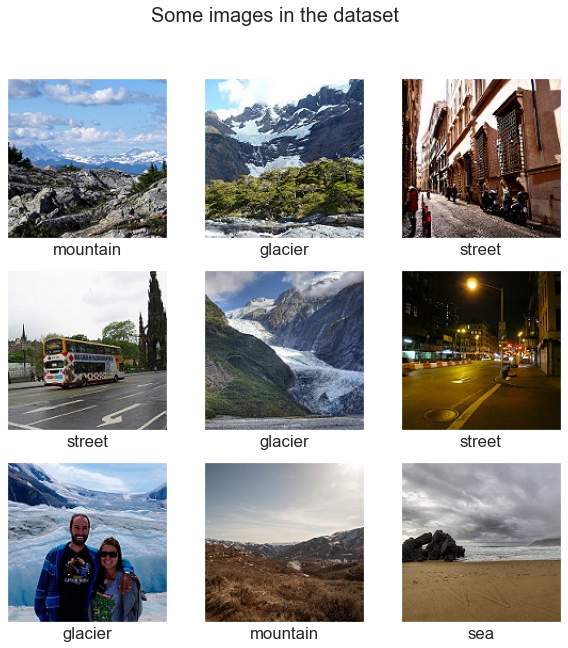

In [10]:
def display_images(class_names, images, labels, size):
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some images in the dataset", fontsize=20)
    
    n = int(np.sqrt(size))
    for i in range(size):
        plt.subplot(n,n,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(labels[class_names[i]])
    plt.show()

display_images(train_labels, train_images, labels, 9)

In [11]:
# test_images

### Simple Model Creation (optimizer-> adam)

In [100]:
from tensorflow import keras
import tensorflow as tf

In [101]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [102]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 41472)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [15]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=8, validation_split = 0.2)

Epoch 1/8
88/88 [==============================] - 140s 2s/step - loss: 1.1671 - accuracy: 0.5585 - val_loss: 1.0007 - val_accuracy: 0.6202
Epoch 2/8
88/88 [==============================] - 140s 2s/step - loss: 0.7772 - accuracy: 0.7167 - val_loss: 0.7946 - val_accuracy: 0.6997
Epoch 3/8
88/88 [==============================] - 131s 1s/step - loss: 0.6368 - accuracy: 0.7718 - val_loss: 0.7457 - val_accuracy: 0.7239
Epoch 4/8
88/88 [==============================] - 133s 2s/step - loss: 0.5106 - accuracy: 0.8222 - val_loss: 0.6645 - val_accuracy: 0.7677
Epoch 5/8
88/88 [==============================] - 143s 2s/step - loss: 0.3552 - accuracy: 0.8814 - val_loss: 0.6606 - val_accuracy: 0.7777
Epoch 6/8
88/88 [==============================] - 134s 2s/step - loss: 0.2575 - accuracy: 0.9171 - val_loss: 0.7631 - val_accuracy: 0.7456
Epoch 7/8
88/88 [==============================] - 132s 2s/step - loss: 0.1800 - accuracy: 0.9458 - val_loss: 0.7860 - val_accuracy: 0.7667
Epoch 8/8
88/88 [===

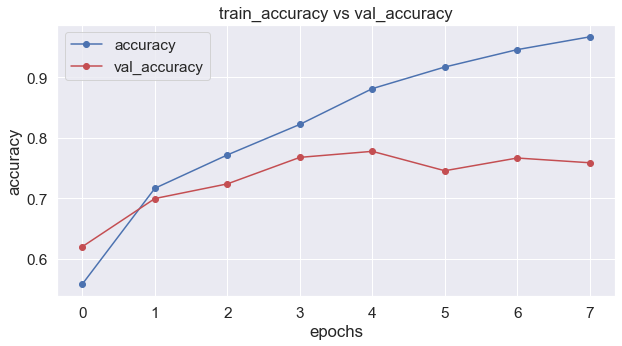

In [31]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.plot(history.history['accuracy'],'bo-', label = "accuracy")
    plt.plot(history.history['val_accuracy'], 'ro-', label = "val_accuracy")
    plt.title("train_accuracy vs val_accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()
    
plot_accuracy_loss(history)

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f"\nThe test accuracy = {round(test_acc,3)}\nThe test lost = {round(test_loss,3)}")

94/94 - 9s - loss: 0.9088 - accuracy: 0.7583 - 9s/epoch - 94ms/step

The test accuracy = 0.758
The test lost = 0.909


### Random images from the prediction dataset

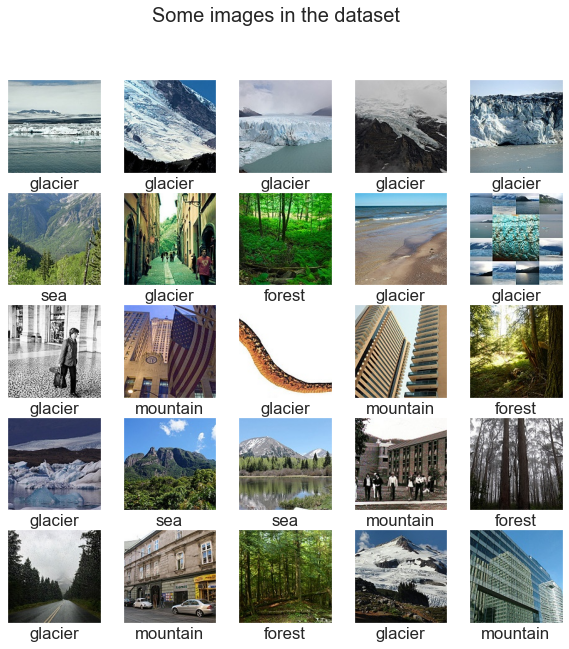

In [18]:
predictions = model.predict(test_images)    
pred_labels = np.argmax(predictions, axis = 1) 
p_labels = [labels[x] for x in pred_labels]

display_images(test_labels, test_images, p_labels, 25)

In [65]:
def plot_CM(test_labels, pred_labels):
    CM = confusion_matrix(test_labels, pred_labels)
    plt.subplots(figsize=(12, 9))
    sn.heatmap(CM, annot=True, 
               annot_kws={"size": 10}, 
               xticklabels=labels, 
               yticklabels=labels)
    plt.xlabel('Predicted', fontsize=15)
    plt.ylabel('Actual', fontsize=15)
    plt.title('Confusion matrix')
    plt.show()
    

### Using confusion matrix to check the accuracy of the model

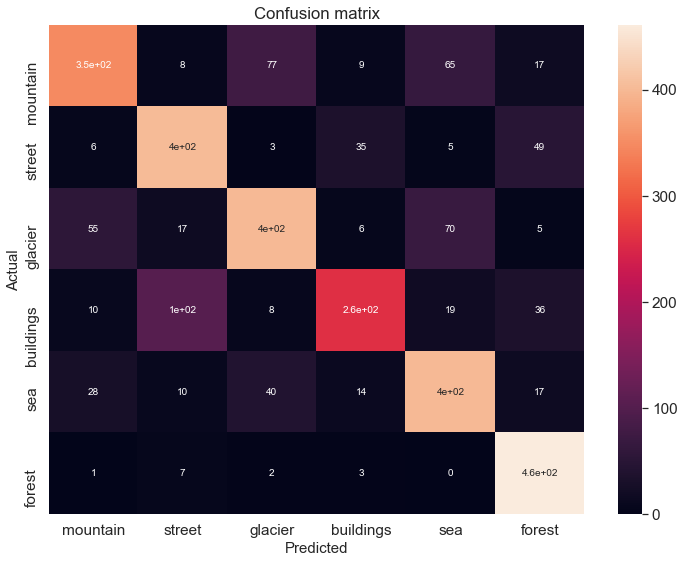

In [19]:
def plot_CM(test_labels, pred_labels):
    CM = confusion_matrix(test_labels, pred_labels)
    plt.subplots(figsize=(12, 9))
    sn.heatmap(CM, annot=True, 
               annot_kws={"size": 10}, 
               xticklabels=labels, 
               yticklabels=labels)
    plt.xlabel('Predicted', fontsize=15)
    plt.ylabel('Actual', fontsize=15)
    plt.title('Confusion matrix')
    plt.show()
    
plot_CM(test_labels, pred_labels)

### Pre-trained models

#### AlexNet

In [44]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, Dense, Dropout
from keras.layers.merge import concatenate
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D

In [45]:
path = r'seg_train\seg_train'
train_datagen = ImageDataGenerator(rescale=1. / 255)
train = train_datagen.flow_from_directory(path, target_size=(227,227), class_mode='categorical')

Found 14034 images belonging to 6 classes.


In [46]:
classes = np.array(train.classes)
print(classes)

[0 0 0 ... 5 5 5]


In [47]:
def AlexNet(input_shape):
    
    X_input = Input(input_shape)
    
    X = Conv2D(96,(11,11),strides = 4,name="conv0")(X_input)
    X = BatchNormalization(axis = 3 , name = "bn0")(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max0')(X)
    
    X = Conv2D(256,(5,5),padding = 'same' , name = 'conv1')(X)
    X = BatchNormalization(axis = 3 ,name='bn1')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max1')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv3')(X)
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(256, (3,3) , padding = 'same' , name='conv4')(X)
    X = BatchNormalization(axis = 3, name = 'bn4')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max2')(X)
    
    X = Flatten()(X)
    
    X = Dense(4096, activation = 'relu', name = "fc0")(X)
    
    X = Dense(4096, activation = 'relu', name = 'fc1')(X) 
    
    X = Dense(6,activation='softmax',name = 'fc2')(X)
    
    model = Model(inputs = X_input, outputs = X, name='AlexNet')
    return model

In [48]:
alex = AlexNet(train[0][0].shape[1:])

In [49]:
alex.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [97]:
alex.summary()

Model: "AlexNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 conv0 (Conv2D)              (None, 55, 55, 96)        34944     
                                                                 
 bn0 (BatchNormalization)    (None, 55, 55, 96)        384       
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 max0 (MaxPooling2D)         (None, 27, 27, 96)        0         
                                                                 
 conv1 (Conv2D)              (None, 27, 27, 256)       614656    
                                                                 
 bn1 (BatchNormalization)    (None, 27, 27, 256)       1024

In [50]:
alex.fit_generator(train,epochs=7)

<ipython-input-50-1e8f19ab66bc>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  alex.fit_generator(train,epochs=7)


Epoch 1/7
439/439 [==============================] - 879s 2s/step - loss: 2.1692 - accuracy: 0.5133
Epoch 2/7
439/439 [==============================] - 898s 2s/step - loss: 0.9506 - accuracy: 0.6284
Epoch 3/7
439/439 [==============================] - 888s 2s/step - loss: 0.8183 - accuracy: 0.6900
Epoch 4/7
439/439 [==============================] - 864s 2s/step - loss: 0.6964 - accuracy: 0.7474
Epoch 5/7
439/439 [==============================] - 876s 2s/step - loss: 0.6165 - accuracy: 0.7811
Epoch 6/7
439/439 [==============================] - 884s 2s/step - loss: 0.5707 - accuracy: 0.7996
Epoch 7/7
439/439 [==============================] - 886s 2s/step - loss: 0.5267 - accuracy: 0.8179


In [52]:
path_test = 'seg_test\seg_test'
test_datagen = ImageDataGenerator(rescale=1. / 255)
test = test_datagen.flow_from_directory(path_test, target_size=(227,227), class_mode='categorical')

Found 3000 images belonging to 6 classes.


In [53]:
preds = alex.evaluate(test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

94/94 [==============================] - 52s 548ms/step - loss: 0.9265 - accuracy: 0.6910
Loss = 0.9265101552009583
Test Accuracy = 0.6909999847412109
